In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import datetime as dt
from sklearn.metrics import mean_squared_error,mean_absolute_error

from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
"""
f = pd.read_csv("Cab_Data.csv",sep=";")
df = f.copy()

df
"""

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [7]:
"""
df["Gain"] = df["Price Charged"] - df["Cost of Trip"]
df"""

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440
...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420


In [8]:
"""df["Gain per KM"] = df["Gain"]/df["KM Travelled"]
df"""

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain,Gain per KM
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,3.049558
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,0.777751
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,1.929439
...,...,...,...,...,...,...,...,...,...
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800,1.225000
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020,0.821667
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200,3.150270
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420,3.652500


In [5]:
"""df.info()"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
 7   Gain            359392 non-null  float64
 8   Gain per KM     359392 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 24.7+ MB


In [6]:
"""df.describe().T"""

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,1.000001e+07,1.011081e+07,1.022104e+07,1.033094e+07,1.044011e+07
KM Travelled,359392.0,2.256725e+01,12.233526,1.900000e+00,1.200000e+01,2.244000e+01,3.296000e+01,4.800000e+01
Price Charged,359392.0,4.234433e+02,274.378911,1.560000e+01,2.064375e+02,3.863600e+02,5.836600e+02,2.048030e+03
Cost of Trip,359392.0,2.861901e+02,157.993661,1.900000e+01,1.512000e+02,2.824800e+02,4.136832e+02,6.912000e+02
Gain,359392.0,1.372532e+02,160.311840,-2.200600e+02,2.801200e+01,8.196200e+01,1.900300e+02,1.463966e+03
Gain per KM,359392.0,6.083579e+00,5.543493,-4.998235e+00,2.000385e+00,4.466809e+00,9.170006e+00,4.111556e+01


In [2]:
mdf = pd.read_csv("masterdf.csv",sep=";")      #A MASTER BRANCH FOR ALL DATA HAS PREVIOUSLY CREATED. 
masterdf = mdf.copy()

masterdf

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain,Gain per KM,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,29290,Card,Male,28,10813
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,10.739870,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,4.574571,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,27703,Card,Male,27,9237
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,6.981330,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656,2.837071,38520,Card,Female,42,19417
359388,10439799,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980,7.660204,12490,Cash,Male,33,18713
359389,10439838,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100,3.747895,41414,Card,Male,38,3960
359390,10439840,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600,3.903571,41677,Cash,Male,23,19454


In [114]:
masterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Gain                359392 non-null  float64
 8   Gain per KM         359392 non-null  float64
 9   Customer ID         359392 non-null  int64  
 10  Payment_Mode        359392 non-null  object 
 11  Gender              359392 non-null  object 
 12  Age                 359392 non-null  int64  
 13  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 38.4+ MB


In [31]:
masterdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,359392.0,1.022076e+07,126805.803715,1.000001e+07,1.011081e+07,1.022104e+07,1.033094e+07,1.044011e+07
KM Travelled,359392.0,2.256725e+01,12.233526,1.900000e+00,1.200000e+01,2.244000e+01,3.296000e+01,4.800000e+01
Price Charged,359392.0,4.234433e+02,274.378911,1.560000e+01,2.064375e+02,3.863600e+02,5.836600e+02,2.048030e+03
Cost of Trip,359392.0,2.861901e+02,157.993661,1.900000e+01,1.512000e+02,2.824800e+02,4.136832e+02,6.912000e+02
Gain,359392.0,1.372532e+02,160.311840,-2.200600e+02,2.801200e+01,8.196200e+01,1.900300e+02,1.463966e+03
Gain per KM,359392.0,6.083579e+00,5.543493,-4.998235e+00,2.000385e+00,4.466809e+00,9.170006e+00,4.111556e+01
Customer ID,359392.0,1.919165e+04,21012.412463,1.000000e+00,2.705000e+03,7.459000e+03,3.607800e+04,6.000000e+04
Age,359392.0,3.533670e+01,12.594234,1.800000e+01,2.500000e+01,3.300000e+01,4.200000e+01,6.500000e+01
Income (USD/Month),359392.0,1.504882e+04,7969.409482,2.000000e+03,8.424000e+03,1.468500e+04,2.103500e+04,3.500000e+04


In [82]:
dfp = masterdf.loc[masterdf["Company"]=="Pink Cab"]   # FOR ONLY PINK CAB
dfp                                                   

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain,Gain per KM,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,57.315,1.882266,29290,Card,Male,28,10813
3,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,23.666,0.826904,27703,Card,Male,27,9237
6,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.934,25.096,1.874235,27703,Card,Male,27,9237
7,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,27.568,3.049558,28712,Cash,Male,53,11242
11,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,25.798,0.777751,28020,Cash,Male,23,23327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359331,10437193,2018-01-05,Pink Cab,SACRAMENTO CA,31.03,436.06,344.433,91.627,2.952852,47760,Card,Male,47,8823
359332,10437278,2018-01-02,Pink Cab,SAN DIEGO CA,26.73,343.83,304.722,39.108,1.463075,18620,Card,Male,27,2876
359333,10437570,2018-01-05,Pink Cab,SILICON VALLEY,22.23,386.13,264.537,121.593,5.469771,14974,Cash,Male,51,8020
359334,10437576,2018-01-05,Pink Cab,TUCSON AZ,35.96,461.77,381.176,80.594,2.241212,41135,Card,Female,24,14269


In [116]:
masterdf.groupby(["Company"]).mean()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Gain,Gain per KM,Customer ID,Age,Income (USD/Month)
Company,,,,,,,,,
Pink Cab,1.022394e+07,22.559917,310.800856,248.148682,62.652174,2.769908,18422.581577,35.322414,15059.047137
Yellow Cab,1.021978e+07,22.569517,458.181990,297.922004,160.259986,7.105508,19428.831732,35.341112,15045.669817


In [83]:
dfy = masterdf.loc[masterdf["Company"]=="Yellow Cab"]     # FOR ONLY YELLOW CAB
dfy                                                       

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain,Gain per KM,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
1,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,10.739870,29290,Cash,Male,28,10813
2,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,4.574571,29290,Card,Male,28,10813
4,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,6.981330,27703,Card,Male,27,9237
5,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,50.8912,8.234822,27703,Cash,Male,27,9237
8,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,210.0920,5.305354,28712,Card,Male,53,11242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656,2.837071,38520,Card,Female,42,19417
359388,10439799,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980,7.660204,12490,Cash,Male,33,18713
359389,10439838,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100,3.747895,41414,Card,Male,38,3960
359390,10439840,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600,3.903571,41677,Cash,Male,23,19454


In [84]:
dfp.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,84711.0,1.022394e+07,126178.205348,1.000001e+07,1.011014e+07,1.022590e+07,1.033642e+07,1.043762e+07
KM Travelled,84711.0,2.255992e+01,12.231092,1.900000e+00,1.200000e+01,2.244000e+01,3.296000e+01,4.800000e+01
Price Charged,84711.0,3.108009e+02,181.995661,1.560000e+01,1.599700e+02,2.980600e+02,4.415050e+02,1.623480e+03
Cost of Trip,84711.0,2.481487e+02,135.403345,1.900000e+01,1.318680e+02,2.463300e+02,3.601800e+02,5.760000e+02
Gain,84711.0,6.265217e+01,77.590378,-2.200600e+02,1.120600e+01,4.150000e+01,9.396500e+01,1.119480e+03
Gain per KM,84711.0,2.769908e+00,2.697212,-4.912054e+00,8.915725e-01,2.423598e+00,4.281847e+00,2.864694e+01
Customer ID,84711.0,1.842258e+04,18084.830799,1.000000e+00,5.317500e+03,8.876000e+03,2.719000e+04,6.000000e+04
Age,84711.0,3.532241e+01,12.644780,1.800000e+01,2.500000e+01,3.300000e+01,4.200000e+01,6.500000e+01
Income (USD/Month),84711.0,1.505905e+04,7991.077762,2.000000e+03,8.371000e+03,1.471300e+04,2.105500e+04,3.500000e+04


In [85]:
dfy.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction ID,274681.0,1.021978e+07,126982.920890,1.000038e+07,1.011084e+07,1.021987e+07,1.032939e+07,1.044011e+07
KM Travelled,274681.0,2.256952e+01,12.234298,1.900000e+00,1.199000e+01,2.244000e+01,3.296000e+01,4.800000e+01
Price Charged,274681.0,4.581820e+02,288.386166,2.073000e+01,2.266800e+02,4.250600e+02,6.338800e+02,2.048030e+03
Cost of Trip,274681.0,2.979220e+02,162.548986,2.280000e+01,1.584000e+02,2.955960e+02,4.324320e+02,6.912000e+02
Gain,274681.0,1.602600e+02,171.823833,-1.769308e+02,3.718000e+01,1.020000e+02,2.286704e+02,1.463966e+03
Gain per KM,274681.0,7.105508e+00,5.790791,-4.998235e+00,2.601667e+00,5.601623e+00,1.088967e+01,4.111556e+01
Customer ID,274681.0,1.942883e+04,21830.791423,1.000000e+00,2.403000e+03,6.445000e+03,3.891600e+04,6.000000e+04
Age,274681.0,3.534111e+01,12.578625,1.800000e+01,2.500000e+01,3.300000e+01,4.200000e+01,6.500000e+01
Income (USD/Month),274681.0,1.504567e+04,7962.727062,2.000000e+03,8.439000e+03,1.467600e+04,2.102300e+04,3.499600e+04


In [18]:
"""
# WINTER
winter2016 = (df['Date of Travel'] > '2015-12-31') & (df['Date of Travel'] <= '2016-02-31')
winter20167 = (df['Date of Travel'] > '2016-11-31') & (df['Date of Travel'] <= '2017-02-31')
winter20178 = (df['Date of Travel'] > '2017-11-31') & (df['Date of Travel'] <= '2018-02-31')
winter2018 = (df['Date of Travel'] > '2018-11-31') & (df['Date of Travel'] <= '2018-12-31')


df.loc[winter2016].info()
df.loc[winter20167].info()
df.loc[winter20178].info()
df.loc[winter2018].info()

# In winter, count of transcastion is 88488
# I WILL MERGE THEM AND MAKE A ONE CSV FOR WINTER DATAS.
"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10370 entries, 0 to 11306
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  10370 non-null  int64  
 1   Date of Travel  10370 non-null  object 
 2   Company         10370 non-null  object 
 3   City            10370 non-null  object 
 4   KM Travelled    10370 non-null  float64
 5   Price Charged   10370 non-null  float64
 6   Cost of Trip    10370 non-null  float64
 7   Gain            10370 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 729.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29089 entries, 91457 to 123235
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  29089 non-null  int64  
 1   Date of Travel  29089 non-null  object 
 2   Company         29089 non-null  object 
 3   City            29089 non-null  obj

In [4]:
""" # WINTER 2016
pProfit = 0
pProfitcount = 0
yProfit = 0
yProfitcount = 0
topKMp = 0
topKMy = 0
for i in range(len(dw16)):
    if dw16["Company"][i] == "Pink Cab":
        pProfit += dw16["Gain"][i]
        pProfitcount += 1
        topKMp += dw16["KM Travelled"][i]
    else:
        yProfit += dw16["Gain"][i]
        yProfitcount += 1
        topKMy += dw16["KM Travelled"][i]

w16GainP = pProfit/pProfitcount
w16GainY = yProfit/yProfitcount
print("Gain average pink :",w16GainP)
print("Gain average yellow :",w16GainY)
print("Pink transaction count :",pProfitcount)
print("Yellow transaction count :",yProfitcount)
print("KM pink :",topKMp)
print("KM yellow :",topKMy)
print("KM average pink :",topKMp/pProfitcount)
print("KM average yellow :",topKMy/yProfitcount)"""

Gain average pink : 81.65321547799712
Gain average yellow : 219.88291233170483
Pink transaction count : 1977
Yellow transaction count : 8393
KM pink : 44438.670000000064
KM yellow : 189905.9800000008
KM average pink : 22.477830045523554
KM average yellow : 22.62671035386641


In [6]:
""" #WINTER 2016-17
pProfit = 0
pProfitcount = 0
yProfit = 0
yProfitcount = 0
topKMp = 0
topKMy = 0
for i in range(len(dw167)):
    if dw167["Company"][i] == "Pink Cab":
        pProfit += dw167["Gain"][i]
        pProfitcount += 1
        topKMp += dw167["KM Travelled"][i]
    else:
        yProfit += dw167["Gain"][i]
        yProfitcount += 1
        topKMy += dw167["KM Travelled"][i]
        
w167GainP = pProfit/pProfitcount
w167GainY = yProfit/yProfitcount

print("Gain average pink :",pProfit/pProfitcount)
print("Gain average yellow :",yProfit/yProfitcount)
print("Pink transaction count :",pProfitcount)
print("Yellow transaction count :",yProfitcount)
print("KM pink :",topKMp)
print("KM yellow :",topKMy)
print("KM average pink :",topKMp/pProfitcount)
print("KM average yellow :",topKMy/yProfitcount)"""

Gain average pink : 90.50713240310105
Gain average yellow : 178.25946785635475
Pink transaction count : 6450
Yellow transaction count : 22639
KM pink : 145570.32000000007
KM yellow : 513290.6500000002
KM average pink : 22.569041860465127
KM average yellow : 22.67284994920271


In [8]:
""" # WINTER 2017-18
pProfit = 0
pProfitcount = 0
yProfit = 0
yProfitcount = 0
topKMp = 0
topKMy = 0
for i in range(len(dw178)):
    if dw178["Company"][i] == "Pink Cab":
        pProfit += dw178["Gain"][i]
        pProfitcount += 1
        topKMp += dw178["KM Travelled"][i]
    else:
        yProfit += dw178["Gain"][i]
        yProfitcount += 1
        topKMy += dw178["KM Travelled"][i]
        
w178GainP = pProfit/pProfitcount
w178GainY = yProfit/yProfitcount

print("Gain average pink :",pProfit/pProfitcount)
print("Gain average yellow :",yProfit/yProfitcount)
print("Pink transaction count :",pProfitcount)
print("Yellow transaction count :",yProfitcount)
print("KM pink :",topKMp)
print("KM yellow :",topKMy)
print("KM average pink :",topKMp/pProfitcount)
print("KM average yellow :",topKMy/yProfitcount)"""

Gain average pink : 82.2004637848962
Gain average yellow : 158.1045404437533
Pink transaction count : 7773
Yellow transaction count : 25690
KM pink : 176187.4199999999
KM yellow : 579832.4700000044
KM average pink : 22.66659204940176
KM average yellow : 22.570356948229055


In [26]:
""" # WINTER 2018
pProfit = 0
pProfitcount = 0
yProfit = 0
yProfitcount = 0
topKMp = 0
topKMy = 0
for i in range(len(dw18)):
    if dw18["Company"][i] == "Pink Cab":
        pProfit += dw18["Gain"][i]
        pProfitcount += 1
        topKMp += dw18["KM Travelled"][i]
    else:
        yProfit += dw18["Gain"][i]
        yProfitcount += 1
        topKMy += dw18["KM Travelled"][i]

w18GainP = pProfit/pProfitcount
w18GainY = yProfit/yProfitcount

print("Gain average pink :",pProfit/pProfitcount)
print("Gain average yellow :",yProfit/yProfitcount)
print("Pink transaction count :",pProfitcount)
print("Yellow transaction count :",yProfitcount)
print("KM pink :",topKMp)
print("KM yellow :",topKMy)
print("KM average pink :",topKMp/pProfitcount)
print("KM average yellow :",topKMy/yProfitcount)"""

Gain average pink : 75.15945447368415
Gain average yellow : 133.17069478157367
Pink transaction count : 3800
Yellow transaction count : 11766
KM pink : 85227.32999999999
KM yellow : 265094.5599999987
KM average pink : 22.428244736842103
KM average yellow : 22.530559238483658


In [8]:
"""mrg = pd.merge(dw16,dw167, how = "outer")  # MERGING WINTER DATAS
mrg"""

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain
0,10000011,8 01 2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10000012,6 01 2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
2,10000013,2 01 2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680
3,10000014,7 01 2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980
4,10000015,3 01 2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440
...,...,...,...,...,...,...,...,...
39454,10151449,2017-02-27,Yellow Cab,WASHINGTON DC,3.60,79.96,43.6320,36.3280
39455,10151457,2017-02-26,Yellow Cab,WASHINGTON DC,32.40,739.48,392.6880,346.7920
39456,10151461,2017-02-28,Yellow Cab,WASHINGTON DC,35.89,694.80,439.2936,255.5064
39457,10151462,2017-02-26,Yellow Cab,WASHINGTON DC,28.84,720.35,370.3056,350.0444


In [10]:
"""mrg1 = pd.merge(dw178,dw18, how = "outer")
mrg1"""

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain
0,10266089,2017-12-01,Pink Cab,ATLANTA GA,19.60,216.47,209.7200,6.7500
1,10266092,2017-12-02,Pink Cab,ATLANTA GA,35.15,372.37,358.5300,13.8400
2,10266094,2017-12-02,Pink Cab,ATLANTA GA,40.28,370.88,430.9960,-60.1160
3,10266095,2017-12-01,Pink Cab,ATLANTA GA,7.21,77.81,82.1940,-4.3840
4,10266098,2017-12-04,Pink Cab,ATLANTA GA,32.76,347.05,363.6360,-16.5860
...,...,...,...,...,...,...,...,...
49024,10439960,2018-12-31,Yellow Cab,WASHINGTON DC,33.93,474.47,411.2316,63.2384
49025,10439984,2018-12-31,Yellow Cab,WASHINGTON DC,40.00,641.78,484.8000,156.9800
49026,10440028,2018-12-31,Yellow Cab,WASHINGTON DC,26.22,405.25,327.2256,78.0244
49027,10440034,2018-12-31,Yellow Cab,WASHINGTON DC,34.68,505.38,470.2608,35.1192


In [12]:
"""
dfwin = pd.merge(mrg,mrg1,how="outer")
dfwin"""

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain
0,10000011,8 01 2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10000012,6 01 2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
2,10000013,2 01 2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680
3,10000014,7 01 2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980
4,10000015,3 01 2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440
...,...,...,...,...,...,...,...,...
88483,10439960,2018-12-31,Yellow Cab,WASHINGTON DC,33.93,474.47,411.2316,63.2384
88484,10439984,2018-12-31,Yellow Cab,WASHINGTON DC,40.00,641.78,484.8000,156.9800
88485,10440028,2018-12-31,Yellow Cab,WASHINGTON DC,26.22,405.25,327.2256,78.0244
88486,10440034,2018-12-31,Yellow Cab,WASHINGTON DC,34.68,505.38,470.2608,35.1192


In [17]:
"""dfwin["Gain per KM"] = dfwin["Gain"]/dfwin["KM Travelled"]
dfwin"""

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain,Gain per KM
0,10000011,8 01 2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266
1,10000012,6 01 2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904
2,10000013,2 01 2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,3.049558
3,10000014,7 01 2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,0.777751
4,10000015,3 01 2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440,1.929439
...,...,...,...,...,...,...,...,...,...
88483,10439960,2018-12-31,Yellow Cab,WASHINGTON DC,33.93,474.47,411.2316,63.2384,1.863790
88484,10439984,2018-12-31,Yellow Cab,WASHINGTON DC,40.00,641.78,484.8000,156.9800,3.924500
88485,10440028,2018-12-31,Yellow Cab,WASHINGTON DC,26.22,405.25,327.2256,78.0244,2.975759
88486,10440034,2018-12-31,Yellow Cab,WASHINGTON DC,34.68,505.38,470.2608,35.1192,1.012664


In [18]:
"""dfwin.to_csv("winter.csv")"""

In [27]:
"""
# AUTUMN
autumn2016 = (df['Date of Travel'] > '2016-08-31') & (df['Date of Travel'] <= '2016-11-31')
autumn2017 = (df['Date of Travel'] > '2017-08-31') & (df['Date of Travel'] <= '2017-11-31')
autumn2018 = (df['Date of Travel'] > '2018-08-31') & (df['Date of Travel'] <= '2018-11-31')

df.loc[autumn2016].info()
df.loc[autumn2017].info()
df.loc[autumn2018].info()

# In autumn, count of transcastion is 120411
# I WILL MERGE THEM AND MAKE A ONE CSV FOR AUTUMN DATAS.
"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36564 entries, 55255 to 94495
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  36564 non-null  int64  
 1   Date of Travel  36564 non-null  object 
 2   Company         36564 non-null  object 
 3   City            36564 non-null  object 
 4   KM Travelled    36564 non-null  float64
 5   Price Charged   36564 non-null  float64
 6   Cost of Trip    36564 non-null  float64
 7   Gain            36564 non-null  float64
 8   Gain per KM     36564 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43142 entries, 174457 to 220607
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  43142 non-null  int64  
 1   Date of Travel  43142 non-null  object 
 2   Company         43142 non-null  

In [29]:
""" # AUTUMUN 2016
pProfit = 0
pProfitcount = 0
yProfit = 0
yProfitcount = 0
topKMp = 0
topKMy = 0
for i in range(len(da16)):
    if da16["Company"][i] == "Pink Cab":
        pProfit += da16["Gain"][i]
        pProfitcount += 1
        topKMp += da16["KM Travelled"][i]
    else:
        yProfit += da16["Gain"][i]
        yProfitcount += 1
        topKMy += da16["KM Travelled"][i]
        
a16GainP = pProfit/pProfitcount
a16GainY = yProfit/yProfitcount

print("Gain average pink :",pProfit/pProfitcount)
print("Gain average yellow :",yProfit/yProfitcount)
print("Pink transaction count :",pProfitcount)
print("Yellow transaction count :",yProfitcount)
print("KM pink :",topKMp)
print("KM yellow :",topKMy)
print("KM average pink :",topKMp/pProfitcount)
print("KM average yellow :",topKMy/yProfitcount)"""

Gain average pink : 71.10504088350842
Gain average yellow : 152.3607970678169
Pink transaction count : 9417
Yellow transaction count : 27147
KM pink : 210098.78999999975
KM yellow : 612978.4999999974
KM average pink : 22.310586173940717
KM average yellow : 22.57997200427294


In [31]:
""" # AUTUMN 2017
pProfit = 0
pProfitcount = 0
yProfit = 0
yProfitcount = 0
topKMp = 0
topKMy = 0
for i in range(len(da17)):
    if da17["Company"][i] == "Pink Cab":
        pProfit += da17["Gain"][i]
        pProfitcount += 1
        topKMp += da17["KM Travelled"][i]
    else:
        yProfit += da17["Gain"][i]
        yProfitcount += 1
        topKMy += da17["KM Travelled"][i]
        
a17GainP = pProfit/pProfitcount
a17GainY = yProfit/yProfitcount
print("Gain average pink :",pProfit/pProfitcount)
print("Gain average yellow :",yProfit/yProfitcount)
print("Pink transaction count :",pProfitcount)
print("Yellow transaction count :",yProfitcount)
print("KM pink :",topKMp)
print("KM yellow :",topKMy)
print("KM average pink :",topKMp/pProfitcount)
print("KM average yellow :",topKMy/yProfitcount)"""

Gain average pink : 67.33028192105479
Gain average yellow : 155.28629978382654
Pink transaction count : 11223
Yellow transaction count : 31919
KM pink : 253044.39999999988
KM yellow : 720155.2799999994
KM average pink : 22.54694823131069
KM average yellow : 22.56196246749583


In [33]:
""" #AUTUMN 2018
pProfit = 0
pProfitcount = 0
yProfit = 0
yProfitcount = 0
topKMp = 0
topKMy = 0
for i in range(len(da18)):
    if da18["Company"][i] == "Pink Cab":
        pProfit += da18["Gain"][i]
        pProfitcount += 1
        topKMp += da18["KM Travelled"][i]
    else:
        yProfit += da18["Gain"][i]
        yProfitcount += 1
        topKMy += da18["KM Travelled"][i]

a18GainP = pProfit/pProfitcount
a18GainY = yProfit/yProfitcount

print("Gain average pink :",pProfit/pProfitcount)
print("Gain average yellow :",yProfit/yProfitcount)
print("Pink transaction count :",pProfitcount)
print("Yellow transaction count :",yProfitcount)
print("KM pink :",topKMp)
print("KM yellow :",topKMy)
print("KM average pink :",topKMp/pProfitcount)
print("KM average yellow :",topKMy/yProfitcount)"""

Gain average pink : 54.34047023304074
Gain average yellow : 129.85761950441767
Pink transaction count : 10599
Yellow transaction count : 30106
KM pink : 239973.30000000008
KM yellow : 676027.3100000009
KM average pink : 22.641126521369948
KM average yellow : 22.454903009366934


In [58]:
"""mrg = pd.merge(da16,da17, how = "outer") # MERGING AUTUMN DATAS
mrg"""

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain
0,10069452,2016-09-05,Pink Cab,ATLANTA GA,27.16,290.26,298.7600,-8.5000
1,10069456,2016-09-04,Pink Cab,ATLANTA GA,17.34,197.67,185.5380,12.1320
2,10069457,2016-09-02,Pink Cab,ATLANTA GA,23.54,282.32,244.8160,37.5040
3,10069459,2016-09-06,Pink Cab,ATLANTA GA,27.00,343.06,297.0000,46.0600
4,10069461,2016-09-04,Pink Cab,ATLANTA GA,38.76,414.23,430.2360,-16.0060
...,...,...,...,...,...,...,...,...
79701,10270039,2017-11-30,Yellow Cab,WASHINGTON DC,44.03,634.69,634.0320,0.6580
79702,10270040,2017-11-26,Yellow Cab,WASHINGTON DC,24.24,378.22,317.0592,61.1608
79703,10270041,2017-11-29,Yellow Cab,WASHINGTON DC,4.00,55.91,57.6000,-1.6900
79704,10270044,2017-11-30,Yellow Cab,WASHINGTON DC,8.26,122.68,113.9880,8.6920


In [59]:
"""dfaut = pd.merge(mrg,da18, how = "outer")
dfaut"""

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain
0,10069452,2016-09-05,Pink Cab,ATLANTA GA,27.16,290.26,298.7600,-8.5000
1,10069456,2016-09-04,Pink Cab,ATLANTA GA,17.34,197.67,185.5380,12.1320
2,10069457,2016-09-02,Pink Cab,ATLANTA GA,23.54,282.32,244.8160,37.5040
3,10069459,2016-09-06,Pink Cab,ATLANTA GA,27.00,343.06,297.0000,46.0600
4,10069461,2016-09-04,Pink Cab,ATLANTA GA,38.76,414.23,430.2360,-16.0060
...,...,...,...,...,...,...,...,...
120406,10419660,2018-11-30,Yellow Cab,WASHINGTON DC,23.69,390.27,292.8084,97.4616
120407,10419662,2018-11-30,Yellow Cab,WASHINGTON DC,30.90,437.07,389.3400,47.7300
120408,10419663,2018-11-30,Yellow Cab,WASHINGTON DC,39.20,516.41,522.1440,-5.7340
120409,10419664,2018-11-27,Yellow Cab,WASHINGTON DC,8.91,124.79,125.0964,-0.3064


In [60]:
"""dfaut["Gain per KM"] = dfaut["Gain"]/dfaut["KM Travelled"]
dfaut"""

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain,Gain per KM
0,10069452,2016-09-05,Pink Cab,ATLANTA GA,27.16,290.26,298.7600,-8.5000,-0.312960
1,10069456,2016-09-04,Pink Cab,ATLANTA GA,17.34,197.67,185.5380,12.1320,0.699654
2,10069457,2016-09-02,Pink Cab,ATLANTA GA,23.54,282.32,244.8160,37.5040,1.593203
3,10069459,2016-09-06,Pink Cab,ATLANTA GA,27.00,343.06,297.0000,46.0600,1.705926
4,10069461,2016-09-04,Pink Cab,ATLANTA GA,38.76,414.23,430.2360,-16.0060,-0.412951
...,...,...,...,...,...,...,...,...,...
120406,10419660,2018-11-30,Yellow Cab,WASHINGTON DC,23.69,390.27,292.8084,97.4616,4.114040
120407,10419662,2018-11-30,Yellow Cab,WASHINGTON DC,30.90,437.07,389.3400,47.7300,1.544660
120408,10419663,2018-11-30,Yellow Cab,WASHINGTON DC,39.20,516.41,522.1440,-5.7340,-0.146276
120409,10419664,2018-11-27,Yellow Cab,WASHINGTON DC,8.91,124.79,125.0964,-0.3064,-0.034388


In [28]:
"""dfaut.to_csv("autumn.csv")"""

In [34]:
"""
# SPRING
spring2016 = (df['Date of Travel'] > '2016-02-31') & (df['Date of Travel'] <= '2016-05-31')
spring2017 = (df['Date of Travel'] > '2017-02-31') & (df['Date of Travel'] <='2017-05-31')
spring2018 = (df['Date of Travel'] > '2018-02-31') & (df['Date of Travel'] <= '2018-05-31')

df.loc[spring2016].info()
df.loc[spring2017].info()
df.loc[spring2018].info()

# In spring, count of transcastion is 66781
# I WILL MERGE THEM AND MAKE A ONE CSV FOR SPRING DATAS.
"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20511 entries, 8536 to 31891
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  20511 non-null  int64  
 1   Date of Travel  20511 non-null  object 
 2   Company         20511 non-null  object 
 3   City            20511 non-null  object 
 4   KM Travelled    20511 non-null  float64
 5   Price Charged   20511 non-null  float64
 6   Cost of Trip    20511 non-null  float64
 7   Gain            20511 non-null  float64
 8   Gain per KM     20511 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23836 entries, 121643 to 147182
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  23836 non-null  int64  
 1   Date of Travel  23836 non-null  object 
 2   Company         23836 non-null  o

In [36]:
""" # SPRING 2016
pProfit = 0
pProfitcount = 0
yProfit = 0
yProfitcount = 0
topKMp = 0
topKMy = 0
for i in range(len(ds16)):
    if ds16["Company"][i] == "Pink Cab":
        pProfit += ds16["Gain"][i]
        pProfitcount += 1
        topKMp += ds16["KM Travelled"][i]
    else:
        yProfit += ds16["Gain"][i]
        yProfitcount += 1
        topKMy += ds16["KM Travelled"][i]
        
s16GainP = pProfit/pProfitcount
s16GainY = yProfit/yProfitcount
print("Gain average pink :",pProfit/pProfitcount)
print("Gain average yellow :",yProfit/yProfitcount)
print("Pink transaction count :",pProfitcount)
print("Yellow transaction count :",yProfitcount)
print("KM pink :",topKMp)
print("KM yellow :",topKMy)
print("KM average pink :",topKMp/pProfitcount)
print("KM average yellow :",topKMy/yProfitcount)"""

Gain average pink : 57.44031550272413
Gain average yellow : 190.83801488496331
Pink transaction count : 4038
Yellow transaction count : 16473
KM pink : 90388.98999999964
KM yellow : 372936.5700000001
KM average pink : 22.384593858345628
KM average yellow : 22.639262429429984


In [38]:
""" #SPRING 2017
pProfit = 0
pProfitcount = 0
yProfit = 0
yProfitcount = 0
topKMp = 0
topKMy = 0
for i in range(len(ds17)):
    if ds17["Company"][i] == "Pink Cab":
        pProfit += ds17["Gain"][i]
        pProfitcount += 1
        topKMp += ds17["KM Travelled"][i]
    else:
        yProfit += ds17["Gain"][i]
        yProfitcount += 1
        topKMy += ds17["KM Travelled"][i]
        
s17GainP = pProfit/pProfitcount
s17GainY = yProfit/yProfitcount

print("Gain average pink :",pProfit/pProfitcount)
print("Gain average yellow :",yProfit/yProfitcount)
print("Pink transaction count :",pProfitcount)
print("Yellow transaction count :",yProfitcount)
print("KM pink :",topKMp)
print("KM yellow :",topKMy)
print("KM average pink :",topKMp/pProfitcount)
print("KM average yellow :",topKMy/yProfitcount)"""

Gain average pink : 57.811236953754694
Gain average yellow : 207.18052343897205
Pink transaction count : 4714
Yellow transaction count : 19122
KM pink : 106878.8100000002
KM yellow : 428805.12999999616
KM average pink : 22.672636826474374
KM average yellow : 22.42470086810983


In [40]:
""" #SPRING 2018
pProfit = 0
pProfitcount = 0
yProfit = 0
yProfitcount = 0
topKMp = 0
topKMy = 0
for i in range(len(ds18)):
    if ds18["Company"][i] == "Pink Cab":
        pProfit += ds18["Gain"][i]
        pProfitcount += 1
        topKMp += ds18["KM Travelled"][i]
    else:
        yProfit += ds18["Gain"][i]
        yProfitcount += 1
        topKMy += ds18["KM Travelled"][i]

s18GainP = pProfit/pProfitcount
s18GainY = yProfit/yProfitcount
print("Gain average pink :",pProfit/pProfitcount)
print("Gain average yellow :",yProfit/yProfitcount)
print("Pink transaction count :",pProfitcount)
print("Yellow transaction count :",yProfitcount)
print("KM pink :",topKMp)
print("KM yellow :",topKMy)
print("KM average pink :",topKMp/pProfitcount)
print("KM average yellow :",topKMy/yProfitcount)"""

Gain average pink : 46.31422574213557
Gain average yellow : 173.26566343749997
Pink transaction count : 4514
Yellow transaction count : 17920
KM pink : 103186.11000000003
KM yellow : 405200.30999999976
KM average pink : 22.859129375276922
KM average yellow : 22.611624441964274


In [32]:
"""mrg = pd.merge(ds16,ds17, how = "outer") # MERGING SPRING DATAS
mrg"""

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain
0,10010889,2016-03-01,Pink Cab,BOSTON MA,36.75,513.51,407.9250,105.5850
1,10010951,2016-03-01,Pink Cab,LOS ANGELES CA,5.40,87.19,54.5400,32.6500
2,10010963,2016-03-01,Pink Cab,LOS ANGELES CA,28.56,461.12,328.4400,132.6800
3,10010974,2016-03-01,Pink Cab,LOS ANGELES CA,2.18,34.21,25.7240,8.4860
4,10010982,2016-03-01,Pink Cab,LOS ANGELES CA,23.69,382.49,260.5900,121.9000
...,...,...,...,...,...,...,...,...
44342,10181396,2017-05-30,Yellow Cab,WASHINGTON DC,3.45,73.78,46.3680,27.4120
44343,10181399,2017-05-31,Yellow Cab,WASHINGTON DC,16.48,339.00,199.7376,139.2624
44344,10181401,2017-05-28,Yellow Cab,WASHINGTON DC,36.00,817.88,449.2800,368.6000
44345,10181402,2017-05-28,Yellow Cab,WASHINGTON DC,23.73,598.80,301.8456,296.9544


In [34]:
"""dfspr = pd.merge(mrg,ds18, how = "outer")
dfspr"""

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain
0,10010889,2016-03-01,Pink Cab,BOSTON MA,36.75,513.51,407.9250,105.5850
1,10010951,2016-03-01,Pink Cab,LOS ANGELES CA,5.40,87.19,54.5400,32.6500
2,10010963,2016-03-01,Pink Cab,LOS ANGELES CA,28.56,461.12,328.4400,132.6800
3,10010974,2016-03-01,Pink Cab,LOS ANGELES CA,2.18,34.21,25.7240,8.4860
4,10010982,2016-03-01,Pink Cab,LOS ANGELES CA,23.69,382.49,260.5900,121.9000
...,...,...,...,...,...,...,...,...
66776,10335749,2018-05-31,Yellow Cab,WASHINGTON DC,18.18,318.24,220.3416,97.8984
66777,10335750,2018-05-31,Yellow Cab,WASHINGTON DC,42.92,736.87,530.4912,206.3788
66778,10335758,2018-05-31,Yellow Cab,WASHINGTON DC,22.04,337.59,288.2832,49.3068
66779,10335759,2018-05-30,Yellow Cab,WASHINGTON DC,25.25,459.00,327.2400,131.7600


In [35]:
"""dfspr["Gain per KM"] = dfspr["Gain"]/dfspr["KM Travelled"]
dfspr"""

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain,Gain per KM
0,10010889,2016-03-01,Pink Cab,BOSTON MA,36.75,513.51,407.9250,105.5850,2.873061
1,10010951,2016-03-01,Pink Cab,LOS ANGELES CA,5.40,87.19,54.5400,32.6500,6.046296
2,10010963,2016-03-01,Pink Cab,LOS ANGELES CA,28.56,461.12,328.4400,132.6800,4.645658
3,10010974,2016-03-01,Pink Cab,LOS ANGELES CA,2.18,34.21,25.7240,8.4860,3.892661
4,10010982,2016-03-01,Pink Cab,LOS ANGELES CA,23.69,382.49,260.5900,121.9000,5.145631
...,...,...,...,...,...,...,...,...,...
66776,10335749,2018-05-31,Yellow Cab,WASHINGTON DC,18.18,318.24,220.3416,97.8984,5.384950
66777,10335750,2018-05-31,Yellow Cab,WASHINGTON DC,42.92,736.87,530.4912,206.3788,4.808453
66778,10335758,2018-05-31,Yellow Cab,WASHINGTON DC,22.04,337.59,288.2832,49.3068,2.237151
66779,10335759,2018-05-30,Yellow Cab,WASHINGTON DC,25.25,459.00,327.2400,131.7600,5.218218


In [37]:
"""dfspr.to_csv("spring.csv")"""

In [41]:
"""
# YAZ  SUMMER
summer2016 = (df['Date of Travel'] > '2016-05-31') & (df['Date of Travel'] <= '2016-08-31')
summer2017 = (df['Date of Travel'] > '2017-05-31') & (df['Date of Travel'] <= '2017-08-31')
summer2018 = (df['Date of Travel'] > '2018-05-31') & (df['Date of Travel'] <= '2018-08-31')

df.loc[summer2016].info()
df.loc[summer2017].info()
df.loc[summer2018].info()

# In summer, count of transcastion is 83712
# I WILL MERGE THEM AND MAKE A ONE CSV FOR SUMMER DATAS.
"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25526 entries, 30144 to 57611
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  25526 non-null  int64  
 1   Date of Travel  25526 non-null  object 
 2   Company         25526 non-null  object 
 3   City            25526 non-null  object 
 4   KM Travelled    25526 non-null  float64
 5   Price Charged   25526 non-null  float64
 6   Cost of Trip    25526 non-null  float64
 7   Gain            25526 non-null  float64
 8   Gain per KM     25526 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29698 entries, 145298 to 177029
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  29698 non-null  int64  
 1   Date of Travel  29698 non-null  object 
 2   Company         29698 non-null  

In [43]:
""" # SUMMER 2016
pProfit = 0
pProfitcount = 0
yProfit = 0
yProfitcount = 0
topKMp = 0
topKMy = 0
for i in range(len(dsu16)):
    if dsu16["Company"][i] == "Pink Cab":
        pProfit += dsu16["Gain"][i]
        pProfitcount += 1
        topKMp += dsu16["KM Travelled"][i]
    else:
        yProfit += dsu16["Gain"][i]
        yProfitcount += 1
        topKMy += dsu16["KM Travelled"][i]
        
su16GainP = pProfit/pProfitcount
su16GainY = yProfit/yProfitcount

print("Gain average pink :",pProfit/pProfitcount)
print("Gain average yellow :",yProfit/yProfitcount)
print("Pink transaction count :",pProfitcount)
print("Yellow transaction count :",yProfitcount)
print("KM pink :",topKMp)
print("KM yellow :",topKMy)
print("KM average pink :",topKMp/pProfitcount)
print("KM average yellow :",topKMy/yProfitcount)"""

Gain average pink : 50.36548947282525
Gain average yellow : 161.13030785091985
Pink transaction count : 6127
Yellow transaction count : 19399
KM pink : 138976.4599999999
KM yellow : 439355.5899999974
KM average pink : 22.68262771339969
KM average yellow : 22.648362802206165


In [45]:
""" #SUMMER 2017
pProfit = 0
pProfitcount = 0
yProfit = 0
yProfitcount = 0
topKMp = 0
topKMy = 0
for i in range(len(dsu17)):
    if dsu17["Company"][i] == "Pink Cab":
        pProfit += dsu17["Gain"][i]
        pProfitcount += 1
        topKMp += dsu17["KM Travelled"][i]
    else:
        yProfit += dsu17["Gain"][i]
        yProfitcount += 1
        topKMy += dsu17["KM Travelled"][i]
        
su17GainP = pProfit/pProfitcount
su17GainY = yProfit/yProfitcount
print("Gain average pink :",pProfit/pProfitcount)
print("Gain average yellow :",yProfit/yProfitcount)
print("Pink transaction count :",pProfitcount)
print("Yellow transaction count :",yProfitcount)
print("KM pink :",topKMp)
print("KM yellow :",topKMy)
print("KM average pink :",topKMp/pProfitcount)
print("KM average yellow :",topKMy/yProfitcount)"""

Gain average pink : 50.16271809100998
Gain average yellow : 149.64714127167625
Pink transaction count : 7208
Yellow transaction count : 22490
KM pink : 163298.42000000016
KM yellow : 507428.9099999968
KM average pink : 22.65516370699225
KM average yellow : 22.56242374388603


In [47]:
""" #SUMMER 2018
pProfit = 0
pProfitcount = 0
yProfit = 0
yProfitcount = 0
topKMp = 0
topKMy = 0
for i in range(len(dsu18)):
    if dsu18["Company"][i] == "Pink Cab":
        pProfit += dsu18["Gain"][i]
        pProfitcount += 1
        topKMp += dsu18["KM Travelled"][i]
    else:
        yProfit += dsu18["Gain"][i]
        yProfitcount += 1
        topKMy += dsu18["KM Travelled"][i]
        
su18GainP = pProfit/pProfitcount
su18GainY = yProfit/yProfitcount
print("Gain average pink :",pProfit/pProfitcount)
print("Gain average yellow :",yProfit/yProfitcount)
print("Pink transaction count :",pProfitcount)
print("Yellow transaction count :",yProfitcount)
print("KM pink :",topKMp)
print("KM yellow :",topKMy)
print("KM average pink :",topKMp/pProfitcount)
print("KM average yellow :",topKMy/yProfitcount"""

Gain average pink : 36.77621947314808
Gain average yellow : 129.84410306703032
Pink transaction count : 6871
Yellow transaction count : 21617
KM pink : 153804.08999999968
KM yellow : 488406.21000000165
KM average pink : 22.3845277252219
KM average yellow : 22.59361659804791


In [41]:
"""mrg = pd.merge(dsu16,dsu17, how = "outer")  # MERGING SUMMER DATAS
mrg"""

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain
0,10038249,2016-06-03,Pink Cab,ATLANTA GA,14.56,151.97,148.5120,3.4580
1,10038251,2016-06-06,Pink Cab,ATLANTA GA,44.80,439.25,465.9200,-26.6700
2,10038253,2016-06-05,Pink Cab,ATLANTA GA,4.08,43.01,48.9600,-5.9500
3,10038256,2016-06-06,Pink Cab,ATLANTA GA,9.54,110.64,114.4800,-3.8400
4,10038258,2016-06-02,Pink Cab,ATLANTA GA,14.70,158.08,157.2900,0.7900
...,...,...,...,...,...,...,...,...
55219,10218140,2017-08-27,Yellow Cab,WASHINGTON DC,40.66,605.26,561.1080,44.1520
55220,10218141,2017-08-27,Yellow Cab,WASHINGTON DC,30.45,498.52,390.9780,107.5420
55221,10218146,2017-08-27,Yellow Cab,WASHINGTON DC,35.97,633.79,500.7024,133.0876
55222,10218147,2017-08-29,Yellow Cab,WASHINGTON DC,16.66,225.45,235.9056,-10.4556


In [42]:
"""dfsum = pd.merge(mrg,dsu18, how = "outer")
dfsum"""

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain
0,10038249,2016-06-03,Pink Cab,ATLANTA GA,14.56,151.97,148.5120,3.4580
1,10038251,2016-06-06,Pink Cab,ATLANTA GA,44.80,439.25,465.9200,-26.6700
2,10038253,2016-06-05,Pink Cab,ATLANTA GA,4.08,43.01,48.9600,-5.9500
3,10038256,2016-06-06,Pink Cab,ATLANTA GA,9.54,110.64,114.4800,-3.8400
4,10038258,2016-06-02,Pink Cab,ATLANTA GA,14.70,158.08,157.2900,0.7900
...,...,...,...,...,...,...,...,...
83707,10370750,28 08 2018,Yellow Cab,WASHINGTON DC,40.28,538.84,488.1936,50.6464
83708,10370753,29 08 2018,Yellow Cab,WASHINGTON DC,36.86,567.32,477.7056,89.6144
83709,10370754,31 08 2018,Yellow Cab,WASHINGTON DC,19.20,348.37,260.3520,88.0180
83710,10370755,28 08 2018,Yellow Cab,WASHINGTON DC,42.80,621.80,529.0080,92.7920


In [43]:
"""dfsum["Gain per KM"] = dfsum["Gain"]/dfsum["KM Travelled"]
dfsum"""

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain,Gain per KM
0,10038249,2016-06-03,Pink Cab,ATLANTA GA,14.56,151.97,148.5120,3.4580,0.237500
1,10038251,2016-06-06,Pink Cab,ATLANTA GA,44.80,439.25,465.9200,-26.6700,-0.595313
2,10038253,2016-06-05,Pink Cab,ATLANTA GA,4.08,43.01,48.9600,-5.9500,-1.458333
3,10038256,2016-06-06,Pink Cab,ATLANTA GA,9.54,110.64,114.4800,-3.8400,-0.402516
4,10038258,2016-06-02,Pink Cab,ATLANTA GA,14.70,158.08,157.2900,0.7900,0.053741
...,...,...,...,...,...,...,...,...,...
83707,10370750,28 08 2018,Yellow Cab,WASHINGTON DC,40.28,538.84,488.1936,50.6464,1.257358
83708,10370753,29 08 2018,Yellow Cab,WASHINGTON DC,36.86,567.32,477.7056,89.6144,2.431210
83709,10370754,31 08 2018,Yellow Cab,WASHINGTON DC,19.20,348.37,260.3520,88.0180,4.584271
83710,10370755,28 08 2018,Yellow Cab,WASHINGTON DC,42.80,621.80,529.0080,92.7920,2.168037


In [44]:
"""dfsum.to_csv("summer.csv")"""

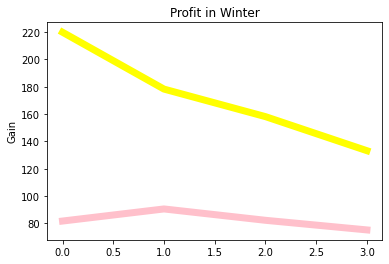

yellow taxi loses 39.43563264221335 percent of its average profits in the following years
pink taxi loses 7.9528539890297765 percent of its average profits in the following years


In [48]:
"""
seasonalProfitsWinterP = [w16GainP ,w167GainP, w178GainP, w18GainP]
seasonalProfitsWinterY = [w16GainY, w167GainY, w178GainY, w18GainY]
plt.plot(seasonalProfitsWinterP ,color="pink",linewidth = '7')
plt.plot(seasonalProfitsWinterY ,color="yellow",linewidth = '7')
plt.ylabel("Gain")
plt.title("Profit in Winter")
plt.show()
tt = 100-((w18GainY*100)/w16GainY)
yy = 100-((w18GainP*100)/w16GainP)
print('yellow taxi loses' ,tt, 'percent of its average profits in the following years')
print('pink taxi loses' ,yy, 'percent of its average profits in the following years')
"""

In [132]:
"""
winterProfitPink = (w16GainP+w167GainP+w178GainP+w18GainP)/4
winterProfitYellow = (w16GainY+w167GainY+w178GainY+w18GainY)/4

print("Average Pink Profit :",winterProfitPink)
print("Average Yellow Profit :",winterProfitYellow)"""

Average Pink Profit : 82.38006653491964
Average Yellow Profit : 172.35440385334664


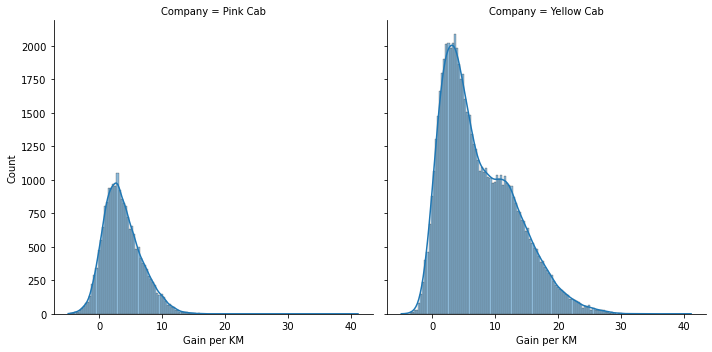

In [49]:
sns.displot(data=dfwin, x="Gain per KM", col="Company", kde = True)

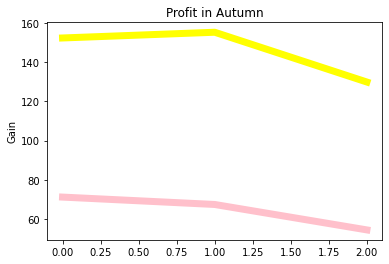

yellow taxi loses 14.769663848229214 percent of its average profits in the following years
pink taxi loses 23.577190086892884 percent of its average profits in the following years


In [17]:
"""
seasonalProfitsAutumnP = [a16GainP ,a17GainP, a18GainP]
seasonalProfitsAutumnY = [a16GainY, a17GainY, a18GainY]
plt.plot(seasonalProfitsAutumnP ,color="pink",linewidth = '7')
plt.plot(seasonalProfitsAutumnY ,color="yellow",linewidth = '7')
plt.ylabel("Gain")
plt.title("Profit in Autumn")
plt.show()
mm = 100-((a18GainY*100)/a16GainY)
nn = 100-((a18GainP*100)/a16GainP)
print('yellow taxi loses' ,mm, 'percent of its average profits in the following years')
print('pink taxi loses' ,nn, 'percent of its average profits in the following years')
"""

In [130]:
"""
autumnProfitPink = (a16GainP+a17GainP+a18GainP)/3
autumnProfitYellow = (a16GainY+a17GainY+a18GainY)/3

print("Average Pink Profit :",autumnProfitPink)
print("Average Yellow Profit :",autumnProfitYellow)
"""

Average Pink Profit : 64.25859767920132
Average Yellow Profit : 145.83490545202037


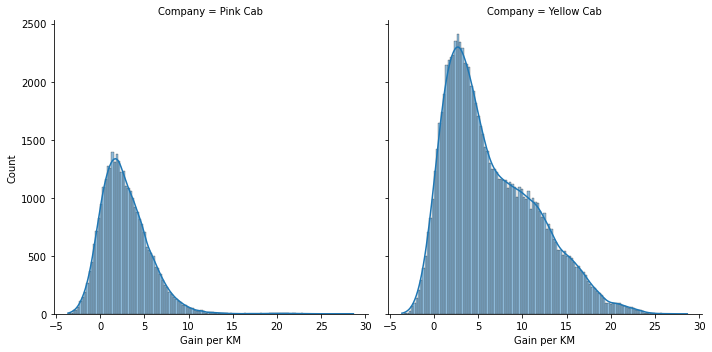

In [62]:
sns.displot(data=dfaut, x="Gain per KM", col="Company", kde = True)

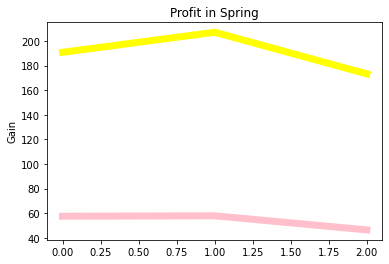

yellow taxi loses 9.207993207252713 percent of its average profits in the following years
pink taxi loses 19.369827033872937 percent of its average profits in the following years


In [50]:
"""
seasonalProfitsSpringP = [s16GainP ,s17GainP, s18GainP]
seasonalProfitsSpringY = [s16GainY, s17GainY, s18GainY]
plt.plot(seasonalProfitsSpringP ,color="pink",linewidth = '7')
plt.plot(seasonalProfitsSpringY ,color="yellow",linewidth = '7')
plt.ylabel("Gain")
plt.title("Profit in Spring")
plt.show()
vv = 100-((s18GainY*100)/s16GainY)
bb = 100-((s18GainP*100)/s16GainP)
print('yellow taxi loses' ,vv, 'percent of its average profits in the following years')
print('pink taxi loses' ,bb, 'percent of its average profits in the following years')"""

In [128]:
"""
springProfitPink = (s16GainP+s17GainP+s18GainP)/3
springProfitYellow = (s16GainY+s17GainY+s18GainY)/3

print("Average Pink Profit :",springProfitPink)
print("Average Yellow Profit :",springProfitYellow)"""

Average Pink Profit : 53.855259399538134
Average Yellow Profit : 190.42806725381175


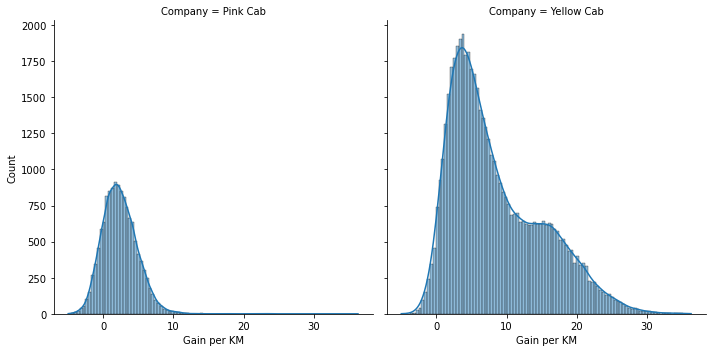

In [63]:
sns.displot(data=dfspr, x="Gain per KM", col="Company", kde = True)

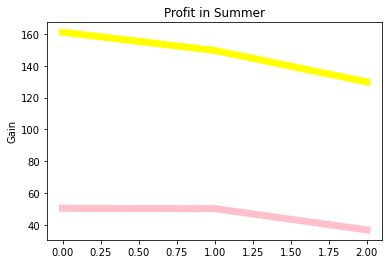

yellow taxi loses 19.416710115663648 percent of its average profits in the following years
pink taxi loses 26.981312287274164 percent of its average profits in the following years


In [51]:
"""
seasonalProfitsSummerP = [su16GainP ,su17GainP, su18GainP]
seasonalProfitsSummerY = [su16GainY, su17GainY, su18GainY]
plt.plot(seasonalProfitsSummerP ,color="pink",linewidth = '7')
plt.plot(seasonalProfitsSummerY ,color="yellow",linewidth = '7')
plt.ylabel("Gain")
plt.title("Profit in Summer")
plt.show()
gg = 100-((su18GainY*100)/su16GainY)
hh = 100-((su18GainP*100)/su16GainP)
print('yellow taxi loses' ,gg, 'percent of its average profits in the following years')
print('pink taxi loses' ,hh, 'percent of its average profits in the following years')"""

In [129]:
"""
summerProfitPink = (su16GainP+su17GainP+su18GainP)/3
summerProfitYellow = (su16GainY+su17GainY+su18GainY)/3

print("Average Pink Profit :",summerProfitPink)
print("Average Yellow Profit :",summerProfitYellow)"""

Average Pink Profit : 45.7681423456611
Average Yellow Profit : 146.87385072987547


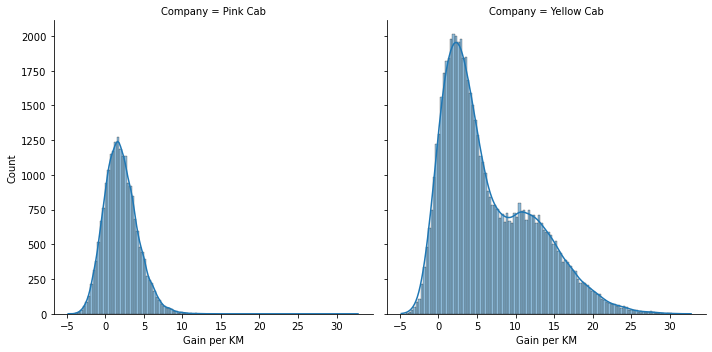

In [64]:
sns.displot(data=dfsum, x="Gain per KM", col="Company", kde = True)

In [10]:
year2016 = (masterdf['Date of Travel'] > '2015-12-31') & (masterdf['Date of Travel'] <= '2016-12-31')
year2017 = (masterdf['Date of Travel'] > '2016-12-31') & (masterdf['Date of Travel'] <= '2017-12-31')
year2018 = (masterdf['Date of Travel'] > '2017-12-31') & (masterdf['Date of Travel'] <= '2018-12-31') 

    
masterdf.loc[year2016].info()
masterdf.loc[year2017].info()
masterdf.loc[year2018].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107319 entries, 0 to 332056
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Column1             107319 non-null  int64  
 1   Transaction ID      107319 non-null  int64  
 2   Date of Travel      107319 non-null  object 
 3   Company             107319 non-null  object 
 4   City                107319 non-null  object 
 5   KM Travelled        107319 non-null  float64
 6   Price Charged       107319 non-null  float64
 7   Cost of Trip        107319 non-null  float64
 8   Gain                107319 non-null  float64
 9   Gain per KM         107319 non-null  float64
 10  Customer ID         107319 non-null  int64  
 11  Payment_Mode        107319 non-null  object 
 12  Gender              107319 non-null  object 
 13  Age                 107319 non-null  int64  
 14  Income (USD/Month)  107319 non-null  int64  
dtypes: float64(5), int64(5), object(5)

In [11]:
print("Year 2016 Profit Statistics :",masterdf.loc[year2016]["Gain"].mean())
print("Year 2016 Profit Per KM :",masterdf.loc[year2016]["Gain per KM"].mean())
print("Year 2017 Profit Statistics :",masterdf.loc[year2017]["Gain"].mean())
print("Year 2017 Profit Per KM :",masterdf.loc[year2017]["Gain per KM"].mean())
print("Year 2018 Profit Statistics :",masterdf.loc[year2018]["Gain"].mean())
print("Year 2018 Profit Per KM :",masterdf.loc[year2018]["Gain per KM"].mean())

Year 2016 Profit Statistics : 145.7384680774144
Year 2016 Profit Per KM : 6.446854883408389
Year 2017 Profit Statistics : 144.8107764065076
Year 2017 Profit Per KM : 6.425383769283666
Year 2018 Profit Statistics : 122.0232752539165
Year 2018 Profit Per KM : 5.412571353005156


In [97]:
"""
warmDays2016 = (df['Date of Travel'] > '2016-02-31') & (df['Date of Travel'] <= '2016-09-01')
warmDays2017 = (df['Date of Travel'] > '2017-02-31') & (df['Date of Travel'] <= '2017-09-01')
warmDays2018 = (df['Date of Travel'] > '2018-02-31') & (df['Date of Travel'] <= '2018-09-01')

df.loc[warmDays2016].info()
df.loc[warmDays2017].info()
df.loc[warmDays2018].info()
        
"""
# In autumn and winter, count of transcastion is 207225
# In spring and summer, count of transcastion is 152167

"""

"""

"""
Year 2016 Winter Profit Statistics : 193.52996048216005
Year 2016-2017 Autumn and Winter Profit Statistics : 143.80328583010927
Year 2017-2018 Autumn and Winter Profit Statistics : 136.18395130022077
Year 2018 Autumn Profit Statistics : 112.70817724115598
Year 2016 Spring and Summer Profit Statistics : 147.55353172564085
Year 2017 Spring and Summer Profit Statistics : 148.1960294676286
Year 2018 Spring and Summer Profit Statistics : 124.9115383947767
"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46319 entries, 8536 to 57611
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  46319 non-null  int64  
 1   Date of Travel  46319 non-null  object 
 2   Company         46319 non-null  object 
 3   City            46319 non-null  object 
 4   KM Travelled    46319 non-null  float64
 5   Price Charged   46319 non-null  float64
 6   Cost of Trip    46319 non-null  float64
 7   Gain            46319 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 54229 entries, 121643 to 177031
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  54229 non-null  int64  
 1   Date of Travel  54229 non-null  object 
 2   Company         54229 non-null  object 
 3   City            54229 non-null  o

In [14]:
"""
masterdf.loc[year2016].to_csv("year2016.csv")
masterdf.loc[year2017].to_csv("year2017.csv")
masterdf.loc[year2018].to_csv("year2018.csv")
"""

CITIES

In [115]:
a = pd.read_csv("City.csv")
da = a.copy()

da

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


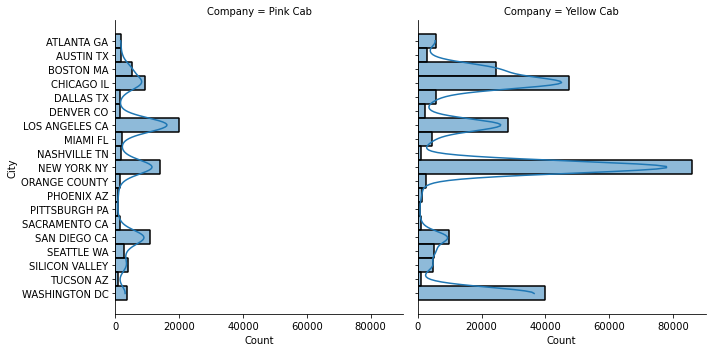

In [76]:
sns.displot(data=masterdf, y="City", col="Company", kde = True)

In [117]:
masterdf["City"].value_counts()

NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: City, dtype: int64

In [68]:
aap = set(dfp["City"].values)
aap

{'ATLANTA GA',
 'AUSTIN TX',
 'BOSTON MA',
 'CHICAGO IL',
 'DALLAS TX',
 'DENVER CO',
 'LOS ANGELES CA',
 'MIAMI FL',
 'NASHVILLE TN',
 'NEW YORK NY',
 'ORANGE COUNTY',
 'PHOENIX AZ',
 'PITTSBURGH PA',
 'SACRAMENTO CA',
 'SAN DIEGO CA',
 'SEATTLE WA',
 'SILICON VALLEY',
 'TUCSON AZ',
 'WASHINGTON DC'}

In [69]:
aay = set(dfy["City"].values)
aay

{'ATLANTA GA',
 'AUSTIN TX',
 'BOSTON MA',
 'CHICAGO IL',
 'DALLAS TX',
 'DENVER CO',
 'LOS ANGELES CA',
 'MIAMI FL',
 'NASHVILLE TN',
 'NEW YORK NY',
 'ORANGE COUNTY',
 'PHOENIX AZ',
 'PITTSBURGH PA',
 'SACRAMENTO CA',
 'SAN DIEGO CA',
 'SEATTLE WA',
 'SILICON VALLEY',
 'TUCSON AZ',
 'WASHINGTON DC'}

In [71]:
plist= []
plistKM=[]
ylist= []
ylistKM= []
for l in aap:
    b = dfp.loc[dfp["City"]==l]
    print(l," Pink Cab        :",b["Gain"].mean())
    print(l," Pink Cab Per KM :",b["Gain per KM"].mean(),"\n")
    if 
    pp = b["Gain"].mean()
    oo = b["Gain per KM"].mean()
    plist.append(pp)
    plistKM.append(oo)
    
for j in aay:
    c = dfy.loc[dfy["City"]==j]
    print(j," Yellow Cab        :",c["Gain"].mean())
    print(j," Yellow Cab Per KM :",c["Gain per KM"].mean(),"\n")
    yy = c["Gain"].mean()
    uu = c["Gain per KM"].mean()
    ylist.append(yy)
    ylistKM.append(uu)

In [71]:
plist= []
plistKM=[]
ylist= []
ylistKM= []
for l in aap:
    b = dfp.loc[dfp["City"]==l]
    print(l," Pink Cab        :",b["Gain"].mean())
    print(l," Pink Cab Per KM :",b["Gain per KM"].mean(),"\n")
    pp = b["Gain"].mean()
    oo = b["Gain per KM"].mean()
    plist.append(pp)
    plistKM.append(oo)
    
for j in aay:
    c = dfy.loc[dfy["City"]==j]
    print(j," Yellow Cab        :",c["Gain"].mean())
    print(j," Yellow Cab Per KM :",c["Gain per KM"].mean(),"\n")
    yy = c["Gain"].mean()
    uu = c["Gain per KM"].mean()
    ylist.append(yy)
    ylistKM.append(uu)

PITTSBURGH PA  Pink Cab        : 25.084659824046916
PITTSBURGH PA  Pink Cab Per KM : 1.0661073382340458 

AUSTIN TX  Pink Cab        : 78.9321680942183
AUSTIN TX  Pink Cab Per KM : 3.60161870512357 

LOS ANGELES CA  Pink Cab        : 56.669119808709006
LOS ANGELES CA  Pink Cab Per KM : 2.5013885041775263 

NEW YORK NY  Pink Cab        : 108.21754048829395
NEW YORK NY  Pink Cab Per KM : 4.790524631082735 

PHOENIX AZ  Pink Cab        : 41.19953009259261
PHOENIX AZ  Pink Cab Per KM : 1.8945853350693338 

SAN DIEGO CA  Pink Cab        : 59.77227970389817
SAN DIEGO CA  Pink Cab Per KM : 2.6384497940223435 

SEATTLE WA  Pink Cab        : 41.28160139092237
SEATTLE WA  Pink Cab Per KM : 1.8254843413711495 

SILICON VALLEY  Pink Cab        : 89.6103584408744
SILICON VALLEY  Pink Cab Per KM : 3.8982923382076407 

ATLANTA GA  Pink Cab        : 54.51196140749161
ATLANTA GA  Pink Cab Per KM : 2.4183665600627062 

DALLAS TX  Pink Cab        : 17.920371014492748
DALLAS TX  Pink Cab Per KM : 0.825393

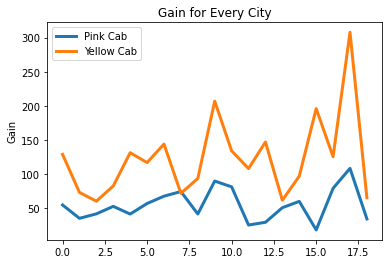

In [68]:
plt.plot(plist ,linewidth = '3',label='Pink Cab')
plt.plot(ylist ,linewidth = '3',label='Yellow Cab')
plt.ylabel("Gain")
plt.title("Gain for Every City")
plt.legend()


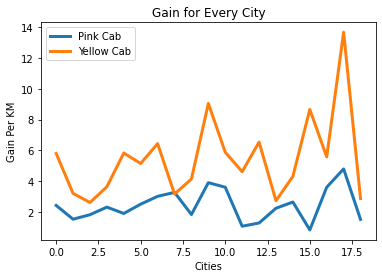

In [66]:
plt.plot(plistKM ,linewidth = '3',label='Pink Cab')
plt.plot(ylistKM ,linewidth = '3',label='Yellow Cab')
plt.ylabel("Gain Per KM")
plt.xlabel("Cities")
plt.title("Gain for Every City")
plt.legend()

In [73]:
countP=0
minusGainP=0
countY=0
minusGainY=0
pprofit=0
yprofit=0
ppro=0
ypro=0
for i in range(len(masterdf)):
    if masterdf["Company"][i]=="Pink Cab":
        countP+=1
        if masterdf["Gain"][i]<0:
            minusGainP+=1
            pprofit+=masterdf["Gain per KM"][i]
            ppro+=masterdf["Gain"][i]    
    else:
        countY+=1
        if masterdf["Gain"][i]<0:
            minusGainY+=1
            yprofit+=masterdf["Gain per KM"][i]
            ypro+=masterdf["Gain"][i]
        
perceP=100*(minusGainP/countP)
perceY=100*(minusGainY/countY)
print("Loss per Ride Pink   : %",perceP)
print("Loss per Ride Yellow : %",perceY)
print("Loss per KM Pink     : ",pprofit/minusGainP)
print("Loss per KM Yellow   : ",yprofit/minusGainY)
print("Total Loss Pink      :",ppro)
print("Total Loss Yellow    :",ypro)

Loss per Ride Pink   : % 13.137609047231175
Loss per Ride Yellow : % 4.983963215511812
Loss per KM Pink     :  -0.9117528077651559
Loss per KM Yellow   :  -0.8387688431945801
Total Loss Pink      : -226672.20899999948
Total Loss Yellow    : -259098.5188


In [87]:
d2016 = pd.read_csv("year2016.csv", sep=";")
df2016 = d2016.copy()

df2016

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain,Gain per KM,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,1.882266,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,0.826904,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680,3.049558,28712,Cash,Male,53,11242
3,10079404,2016-09-21,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,210.0920,5.305354,28712,Card,Male,53,11242
4,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980,0.777751,28020,Cash,Male,23,23327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107314,10134414,2016-12-31,Yellow Cab,SEATTLE WA,34.92,572.19,502.8480,69.3420,1.985739,37735,Card,Female,50,8172
107315,10134422,2016-12-31,Yellow Cab,SEATTLE WA,28.50,397.00,359.1000,37.9000,1.329825,38793,Card,Male,24,7590
107316,10134471,2016-12-31,Yellow Cab,SILICON VALLEY,21.78,591.13,282.2688,308.8612,14.180955,13880,Card,Male,39,13058
107317,10134476,2016-12-31,Yellow Cab,TUCSON AZ,32.64,755.21,426.9312,328.2788,10.057561,40997,Card,Female,26,28567


In [88]:
d2017 = pd.read_csv("year2017.csv", sep=";")
df2017 = d2017.copy()

df2017

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain,Gain per KM,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10186994,2017-06-23,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,118.9736,6.540605,28712,Card,Male,53,11242
1,10140112,2017-01-27,Yellow Cab,ATLANTA GA,24.72,515.66,323.3376,192.3224,7.780032,28020,Card,Male,23,23327
2,10179732,2017-06-03,Yellow Cab,ATLANTA GA,20.00,321.04,271.2000,49.8400,2.492000,27182,Cash,Male,33,8536
3,10196539,2017-07-19,Pink Cab,ATLANTA GA,26.73,329.46,299.3760,30.0840,1.125477,27318,Card,Male,25,13984
4,10197294,2017-07-16,Yellow Cab,ATLANTA GA,15.00,410.62,205.2000,205.4200,13.694667,27318,Card,Male,25,13984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128505,10290808,2017-12-31,Yellow Cab,PHOENIX AZ,30.24,543.01,406.4256,136.5844,4.516680,22634,Cash,Female,24,15766
128506,10290814,2017-12-31,Yellow Cab,PHOENIX AZ,9.52,188.25,114.2400,74.0100,7.774160,21008,Card,Female,40,26496
128507,10290816,2017-12-31,Yellow Cab,PHOENIX AZ,38.61,763.50,472.5864,290.9136,7.534670,21053,Card,Male,51,23504
128508,10291212,2017-12-31,Yellow Cab,SILICON VALLEY,12.00,354.78,169.9200,184.8600,15.405000,13435,Cash,Female,51,17451


In [89]:
d2018 = pd.read_csv("year2018.csv", sep=";")
df2018 = d2018.copy()

df2018

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gain,Gain per KM,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10351127,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,10.739870,29290,Cash,Male,28,10813
1,10412921,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,4.574571,29290,Card,Male,28,10813
2,10320494,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,6.981330,27703,Card,Male,27,9237
3,10324737,2018-05-04,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,50.8912,8.234822,27703,Cash,Male,27,9237
4,10395626,2018-10-27,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,25.0960,1.874235,27703,Card,Male,27,9237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123558,10439790,2018-01-07,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,47.2656,2.837071,38520,Card,Female,42,19417
123559,10439799,2018-01-03,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,105.0980,7.660204,12490,Cash,Male,33,18713
123560,10439838,2018-01-04,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,71.2100,3.747895,41414,Card,Male,38,3960
123561,10439840,2018-01-06,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,21.8600,3.903571,41677,Cash,Male,23,19454


GENDER

In [77]:
b = pd.read_csv("Customer_ID.csv")
db = b.copy()

db

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [110]:
masterdf["Gender"].value_counts()

Male      205912
Female    153480
Name: Gender, dtype: int64

In [111]:
dfp["Gender"].value_counts()

Male      47231
Female    37480
Name: Gender, dtype: int64

In [112]:
dfy["Gender"].value_counts()

Male      158681
Female    116000
Name: Gender, dtype: int64

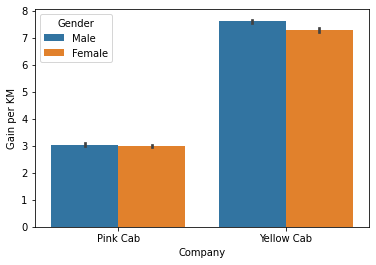

In [19]:
sns.barplot(x = "Company", y = "Gain per KM", hue = "Gender", data = df2016);

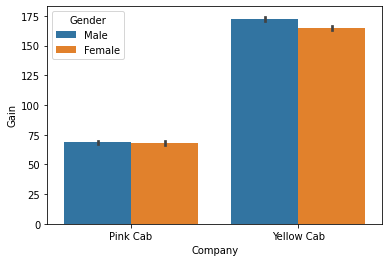

In [20]:
sns.barplot(x = "Company", y = "Gain", hue = "Gender", data = df2016);

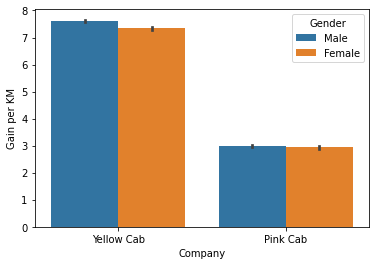

In [21]:
sns.barplot(x = "Company", y = "Gain per KM", hue = "Gender", data = df2017);

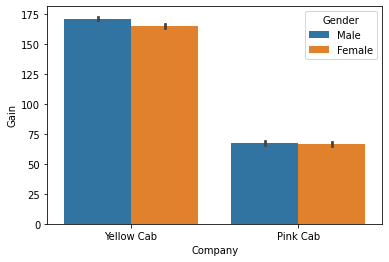

In [22]:
sns.barplot(x = "Company", y = "Gain", hue = "Gender", data = df2017);

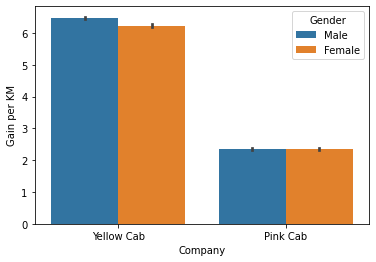

In [23]:
sns.barplot(x = "Company", y = "Gain per KM", hue = "Gender", data = df2018);

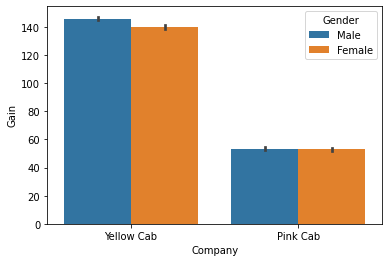

In [24]:
sns.barplot(x = "Company", y = "Gain", hue = "Gender", data = df2018);

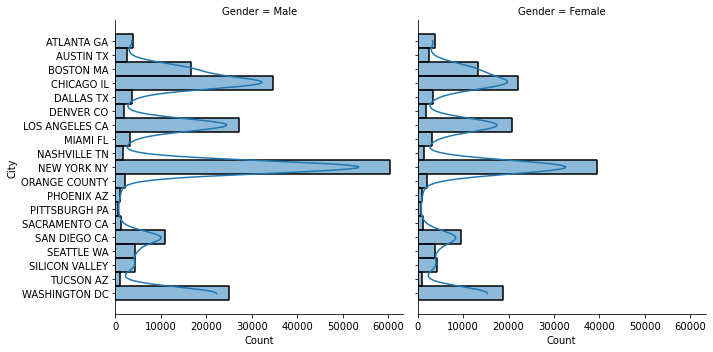

In [3]:
sns.displot(data=masterdf, y="City", col="Gender", kde = True)

INCOME

In [120]:
poorp = (masterdf['Income (USD/Month)'] <= 10000) & (masterdf['Company'] == 'Pink Cab')
poory = (masterdf['Income (USD/Month)'] <= 10000) & (masterdf['Company'] == 'Yellow Cab')
middlep = (masterdf['Income (USD/Month)'] > 10000) & (masterdf['Income (USD/Month)'] <= 20000) & (masterdf['Company'] == 'Pink Cab')
middley = (masterdf['Income (USD/Month)'] > 10000) & (masterdf['Income (USD/Month)'] <= 20000) & (masterdf['Company'] == 'Yellow Cab')
richp = (masterdf['Income (USD/Month)'] > 20000) & (masterdf['Company'] == 'Pink Cab')
richy = (masterdf['Income (USD/Month)'] > 20000) & (masterdf['Company'] == 'Yellow Cab')

masterdf.loc[poorp].info()
masterdf.loc[poory].info()
masterdf.loc[middlep].info()
masterdf.loc[middley].info()
masterdf.loc[richp].info()
masterdf.loc[richy].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26702 entries, 3 to 359333
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      26702 non-null  int64  
 1   Date of Travel      26702 non-null  object 
 2   Company             26702 non-null  object 
 3   City                26702 non-null  object 
 4   KM Travelled        26702 non-null  float64
 5   Price Charged       26702 non-null  float64
 6   Cost of Trip        26702 non-null  float64
 7   Gain                26702 non-null  float64
 8   Gain per KM         26702 non-null  float64
 9   Customer ID         26702 non-null  int64  
 10  Payment_Mode        26702 non-null  object 
 11  Gender              26702 non-null  object 
 12  Age                 26702 non-null  int64  
 13  Income (USD/Month)  26702 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
Int64I

In [59]:
masterdf.loc[richp]["Gain"].mean()

63.008547776879446

In [60]:
masterdf.loc[richp]["Gain per KM"].mean()

2.7765459792032074

In [61]:
masterdf.loc[richy]["Gain"].mean()

160.73953498515795

In [62]:
masterdf.loc[richy]["Gain per KM"].mean()

7.152899364502701

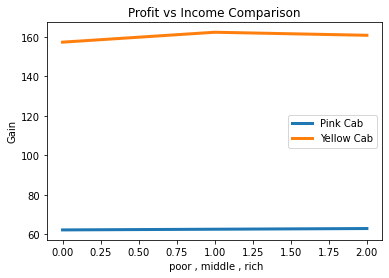

In [68]:
grap = [62.31,62.66,63.01]
gray = [157.26,162.28,160.74]

plt.plot(grap,label='Pink Cab',linewidth = '3')
plt.plot(gray,label='Yellow Cab',linewidth = '3')
plt.ylabel("Gain")
plt.xlabel(" poor , middle , rich")
plt.title("Profit vs Income Comparison")
plt.legend()

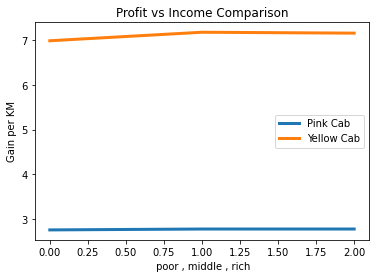

In [69]:
grap = [2.76,2.78,2.78]
gray = [6.98,7.17,7.15]

plt.plot(grap,label='Pink Cab',linewidth = '3')
plt.plot(gray,label='Yellow Cab',linewidth = '3')
plt.ylabel("Gain per KM")
plt.xlabel(" poor , middle , rich")
plt.title("Profit vs Income Comparison")
plt.legend()

AGE

In [170]:
dfp.groupby("Age").mean()  #Grouped by ages.

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Gain,Gain per KM,Customer ID,Income (USD/Month)
Age,,,,,,,,
18,1.022064e+07,22.549159,310.530064,248.288509,62.241555,2.786969,18479.720478,14687.696188
19,1.022242e+07,22.660418,314.076675,249.527256,64.549419,2.801051,17382.269762,14799.539171
20,1.022497e+07,22.452408,311.590953,246.827198,64.763755,2.878061,17948.445846,14940.818437
21,1.022556e+07,22.474236,310.124023,247.453549,62.670474,2.756197,18108.122394,14466.238224
22,1.022541e+07,22.882968,316.035156,252.371967,63.663189,2.790473,18002.833633,15325.947539
23,1.022186e+07,22.661874,315.115836,249.775438,65.340398,2.861482,17611.782012,15311.786474
24,1.022671e+07,22.290015,306.672404,245.075232,61.597173,2.731926,18736.071910,15344.354307
25,1.022275e+07,22.551230,310.680704,247.796783,62.883920,2.784768,19157.397299,14614.289623
26,1.022724e+07,22.855435,315.304036,251.201263,64.102773,2.774769,18308.187630,14828.316862


In [171]:
dfy.groupby("Age").mean()


,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Gain,Gain per KM,Customer ID,Income (USD/Month)
Age,,,,,,,,
18,1.022056e+07,22.518248,461.736826,297.238151,164.498675,7.222887,19015.119951,14391.704406
19,1.021984e+07,22.453412,443.027723,296.411109,146.616614,6.528367,19215.414823,15136.463854
20,1.021883e+07,22.661661,466.460528,299.195719,167.264809,7.389232,18782.853456,15703.290316
21,1.022119e+07,22.662526,461.433111,299.034277,162.398833,7.273156,18614.407646,14803.723334
22,1.021941e+07,22.627550,459.739274,298.827137,160.912137,7.149446,19023.710307,15167.217575
23,1.022179e+07,22.559455,463.515563,297.699430,165.816133,7.351938,18379.453474,15137.767262
24,1.022011e+07,22.493534,461.958821,296.969279,164.989542,7.362269,19248.416696,15200.736116
25,1.021990e+07,22.658455,451.997934,299.101246,152.896688,6.775047,20856.692106,15015.563489
26,1.021927e+07,22.495507,454.462720,297.020294,157.442426,6.967908,19986.131492,14870.696496


In [174]:
gain1 = 0
m1=0
perkm1 = 0
gain2 = 0
m2=0
perkm2 = 0
gain3 = 0
m3=0
perkm3 = 0
gain4 = 0
m4=0
perkm4 = 0
gain5 = 0
m5=0
perkm5 = 0
gain6 = 0
m6=0
perkm6 = 0
for i in range(len(masterdf)):
    if masterdf["Company"][i] == "Pink Cab":
        if masterdf["Age"][i] < 30:
            gain1 += masterdf["Gain"][i]
            m1 += 1
            perkm1 += masterdf["Gain per KM"][i]
        elif masterdf["Age"][i] < 55 and masterdf["Age"][i] >= 30:
            gain2 += masterdf["Gain"][i]
            m2 += 1
            perkm2 += masterdf["Gain per KM"][i]
        elif masterdf["Age"][i] >= 55:
            gain3 += masterdf["Gain"][i]
            m3 += 1
            perkm3 += masterdf["Gain per KM"][i]
    else:
        if masterdf["Age"][i] < 30:
            gain4 += masterdf["Gain"][i]
            m4 += 1
            perkm4 += masterdf["Gain per KM"][i]
        elif masterdf["Age"][i] < 55 and masterdf["Age"][i] >= 30:
            gain5 += masterdf["Gain"][i]
            m5 += 1
            perkm5 += masterdf["Gain per KM"][i]
        elif masterdf["Age"][i] >= 55:
            gain6 += masterdf["Gain"][i]
            m6 += 1
            perkm6 += masterdf["Gain per KM"][i]
            
print("Pink Cab age under 30 Profit per KM: ",perkm1/m1)
print("Pink Cab age 30<x<55 Profit per KM: ",perkm2/m2)
print("Pink Cab age over 55 Profit per KM: ",perkm3/m3)
print("Yellow Cab age under 30 Profit per KM: ",perkm4/m4)
print("Yellow Cab age 30<x<55 Profit per KM: ",perkm5/m5)
print("Yellow Cab age over 55 Profit per KM: ",perkm6/m6)

Pink Cab age under 30 Profit per KM:  2.7905518712152855
Pink Cab age 30<x<55 Profit per KM:  2.754747839353046
Pink Cab age over 55 Profit per KM:  2.7652446526189287
Yellow Cab age under 30 Profit per KM:  7.150275101406787
Yellow Cab age 30<x<55 Profit per KM:  7.116281376235282
Yellow Cab age over 55 Profit per KM:  6.9088683388225975


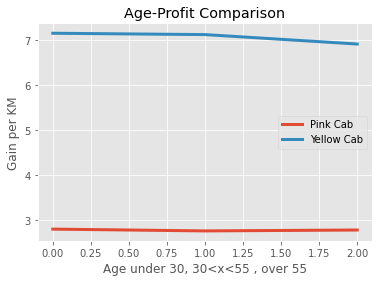

In [177]:
grap = [2.79,2.75,2.77]
gray = [7.15,7.12,6.91]

plt.plot(grap,label='Pink Cab',linewidth = '3')
plt.plot(gray,label='Yellow Cab',linewidth = '3')
plt.ylabel("Gain per KM")
plt.xlabel("Age under 30, 30<x<55 , over 55")
plt.title("Age-Profit Comparison")
plt.legend()

PAYMENT MODE

In [4]:
cM = 0
cF = 0
cMY = 0
cFY = 0

for i in range(len(masterdf)):
    if masterdf["Company"][i]=="Pink Cab":
        if masterdf["Payment_Mode"][i]=="Card":
            cM += 1
        else:
            cF += 1
            
    elif masterdf["Company"][i]=="Yellow Cab":
        if masterdf["Payment_Mode"][i]=="Card":
            cMY += 1
        else:
            cFY += 1
            

print(cM)
print(cF)
print(cMY)
print(cFY)

50719
33992
164785
109896


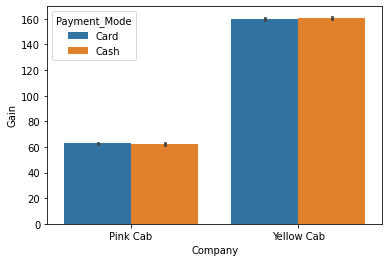

In [5]:
sns.barplot(x = "Company", y = "Gain", hue = "Payment_Mode", data = masterdf);